### Nombre: Andres Viscaino

In [12]:
import math
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
url = 'time_series_covid19_confirmed_global.csv'
df = pd.read_csv(url)
df = df.replace(np.nan, 0)
df=df.loc[df['Country/Region'] == 'Ecuador']
df=df.iloc[0,43:]
df

3/1/20           6
3/2/20           6
3/3/20           7
3/4/20          10
3/5/20          13
             ...  
10/29/20    166302
10/30/20    167147
10/31/20    168192
11/1/20     169194
11/2/20     169562
Name: 106, Length: 247, dtype: object

(array([-133729.90437802,   44651.93374063]), array([[ 81258008.7247911 , -17188795.85264343],
       [-17188795.85264343,   3799247.96718624]]))


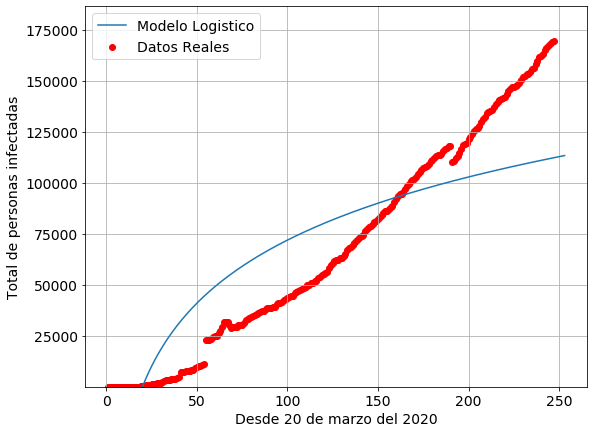

In [15]:
y=list(df.iloc[:])
x=list(np.array(range(1,len(y)+1)))

def modelo_logistico(x,a,b):
    return a+b*np.log(x)
exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [9, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde 20 de marzo del 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.4,max(y)*1.1)) # Definir los limites de Y
plt.grid()
plt.show()

La prediccion para los 7 dias es 160497


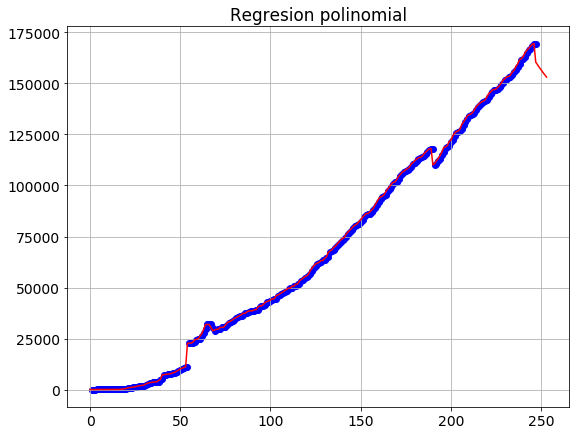

In [16]:
y=list(df.iloc[:])
y1=y[0:len(y)]
x1 = np.array(range(1,len(y)+1)).reshape(-1, 1)
lin = LinearRegression() 
lin.fit(x1, y1) 
poly = PolynomialFeatures(degree = 6) 
X_poly = poly.fit_transform(x1) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(x1, y1, color = 'blue') 
X1 =  np.array(range(len(y)-14,len(y)-7))
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
print('La prediccion para los 7 dias es',int(pre[6]))
pre=np.flip(pre)
for i in pre:
    y1.append(i)
x2=np.array(range(0,len(y1))) 
plt.plot(x2, y1, color = 'r')
plt.plot()
plt.title('Regresion polinomial') 
plt.grid()
plt.show() 

### Conclusion 
Podemos determinar que los datos de la regresion polinomial se acopla mejor a la prediccion 
* Extendiendo el modelo lineal al agregar predictores adicionales, obtenidos al elevar cada uno de los predictores originales a una potencia
* Pode revisar los datos de contagio tanto de recuperados si cargamos el csv de recuperados y predecir el numero de pacientes que se recuperan despues del Covid